# Step 0: Imports and Reading Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the data files
df_games = pd.read_parquet('../data/steam_games.parquet', engine='pyarrow')
df_user_reviews = pd.read_parquet('../data/user_reviews.parquet', engine='pyarrow')
df_user_items = pd.read_parquet('../data/user_items.parquet', engine='pyarrow')

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27657 entries, 88310 to 120443
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        27657 non-null  object 
 1   app_name      27657 non-null  object 
 2   release_date  27657 non-null  object 
 3   price         27657 non-null  float32
 4   id            27657 non-null  object 
 5   developer     27657 non-null  object 
dtypes: float32(1), object(5)
memory usage: 1.4+ MB


In [7]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          59305 non-null  object
 1   item_id          59305 non-null  object
 2   helpful          59305 non-null  object
 3   recommend        59305 non-null  bool  
 4   review           59305 non-null  object
 5   sentiment_score  59305 non-null  int64 
 6   posted year      49186 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 3.2+ MB


In [8]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           88310 non-null  object
 1   items_count       88310 non-null  int64 
 2   steam_id          88310 non-null  object
 3   playtime_forever  88310 non-null  int64 
 4   item_id           88310 non-null  object
 5   item_name         88310 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


In [9]:
# Select only the desired columns
df_games = df_games[['id', 'genres', 'app_name', 'price', 'release_date', 'developer']]
df_user_reviews = df_user_reviews[['user_id', 'item_id', 'sentiment_score', 'recommend']]
df_user_items = df_user_items[['user_id', 'item_id', 'playtime_forever']]

In [18]:
# Merge df_games and df_user_reviews
df = df_games.merge(df_user_reviews, left_on='id', right_on='item_id', how='inner')
df
# Merge the result with df_user_items
# df = df.merge(df_user_items, on=['item_id'], how='inner')

,id,genres,app_name,price,release_date,developer,user_id,item_id,sentiment_score,recommend
0,282010,"[Racing, Singleplayer, Action, Gore, Multiplay...",carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True
1,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True
2,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,GamerFag,70,0,True
3,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,76561198020928326,70,1,True
4,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,Bluegills,70,2,True
...,...,...,...,...,...,...,...,...,...,...
49694,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,76561198023508728,80,1,False
49695,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,Lone_walker,80,2,True
49696,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,green290,80,1,True
49697,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,174gamecuman700kngkakak,80,1,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49699 entries, 0 to 49698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               49699 non-null  object 
 1   genres           49699 non-null  object 
 2   app_name         49699 non-null  object 
 3   price            49699 non-null  float32
 4   release_date     49699 non-null  object 
 5   developer        49699 non-null  object 
 6   user_id          49699 non-null  object 
 7   item_id          49699 non-null  object 
 8   sentiment_score  49699 non-null  int64  
 9   recommend        49699 non-null  bool   
dtypes: bool(1), float32(1), int64(1), object(7)
memory usage: 3.3+ MB


# Step 1: Data Understanding

In [21]:
df.shape

(49699, 10)

In [22]:
df.head(5)

,id,genres,app_name,price,release_date,developer,user_id,item_id,sentiment_score,recommend
0,282010,"[Racing, Singleplayer, Action, Gore, Multiplay...",carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True
1,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True
2,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,GamerFag,70,0,True
3,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,76561198020928326,70,1,True
4,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,Bluegills,70,2,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49699 entries, 0 to 49698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               49699 non-null  object 
 1   genres           49699 non-null  object 
 2   app_name         49699 non-null  object 
 3   price            49699 non-null  float32
 4   release_date     49699 non-null  object 
 5   developer        49699 non-null  object 
 6   user_id          49699 non-null  object 
 7   item_id          49699 non-null  object 
 8   sentiment_score  49699 non-null  int64  
 9   recommend        49699 non-null  bool   
dtypes: bool(1), float32(1), int64(1), object(7)
memory usage: 3.3+ MB


In [24]:
df.isnull().sum()

id                 0
genres             0
app_name           0
price              0
release_date       0
developer          0
user_id            0
item_id            0
sentiment_score    0
recommend          0
dtype: int64

### error unhashable type: 'numpy.ndarray'

In [26]:
# >> df.nunique: error unhashable type: 'numpy.ndarray'
# Identify which column isnt a hashable type
for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")

id: <class 'str'>
genres: <class 'numpy.ndarray'>
app_name: <class 'str'>
price: <class 'numpy.float32'>
release_date: <class 'str'>
developer: <class 'str'>
user_id: <class 'str'>
item_id: <class 'str'>
sentiment_score: <class 'numpy.int64'>
recommend: <class 'numpy.bool_'>


In [6]:
# converting 'genres' into hashable type
# df['genres'] = df['genres'].apply(lambda x: str(x))

In [14]:
df.nunique()

TypeError: unhashable type: 'numpy.ndarray'

### describe

In [25]:
df.dtypes

id                  object
genres              object
app_name            object
price              float32
release_date        object
developer           object
user_id             object
item_id             object
sentiment_score      int64
recommend             bool
dtype: object

In [27]:
df.describe(include=['object'])

,id,genres,app_name,release_date,developer,user_id,item_id
count,49699,49699,49699,49699,49699,49699,49699
unique,3000,2970,3000,29,2082,23129,3000
top,730,"[e-sports, Strategy, FPS, Action, PvP, Tactica...",counter-strike: global offensive,2012,Valve,76561198064484479,730
freq,3759,3759,3759,8934,9563,20,3759


In [28]:
df.describe()

,price,sentiment_score
count,49699.000000,49699.000000
mean,13.846810,1.402523
std,14.773242,0.637515
min,0.000000,0.000000
25%,0.000000,1.000000
50%,11.990000,1.000000
75%,19.990000,2.000000
max,771.710022,2.000000


# Step 2: Data Preperation

Dropped columns just before the merge.   
No rename neaded.

In [18]:
df.isna().sum()

id                  0
genres              0
app_name            0
price               0
release_date        0
developer           0
user_id             0
item_id             0
sentiment_score     0
recommend           0
playtime_forever    0
dtype: int64

# Step 3: Feature Understanding

Univariate analysis

### Plotting Feature Distributions
Histogram, KDE, Boxplot

In [19]:
df.dtypes

id                   object
genres               object
app_name             object
price               float32
release_date         object
developer            object
user_id              object
item_id              object
sentiment_score       int64
recommend              bool
playtime_forever      int64
dtype: object

In [7]:
df['recommend'] = df['recommend'].astype(int)

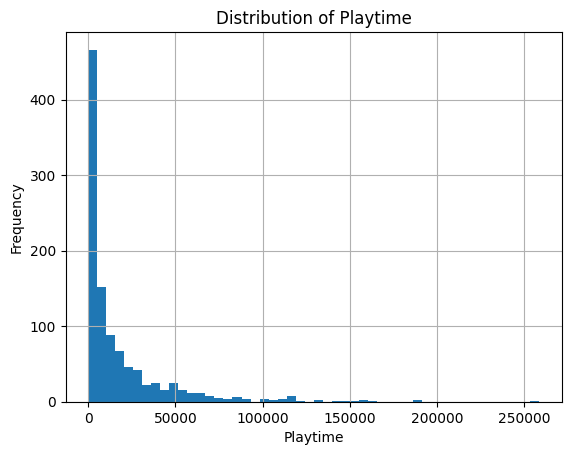

In [21]:
import matplotlib.pyplot as plt

df['playtime_forever'].hist(bins=50)
plt.title('Distribution of Playtime')
plt.xlabel('Playtime')
plt.ylabel('Frequency')
plt.show()

In [8]:
df['genres'].value_counts

<bound method IndexOpsMixin.value_counts of 0       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
1       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
2       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
3       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
4       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
                              ...                        
1036    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1037    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1038    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1039    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1040    ['War' 'First-Person' 'Action' 'Shooter' 'Mult...
Name: genres, Length: 1041, dtype: object>

In [23]:
# # explode 'genres' and count 'genres' frequency
# genre_counts = df['genres'].explode().value_counts()

# # Crear el histograma con los 40 géneros más comunes
# genre_counts[:25].plot(kind='bar')
# plt.title('Distribution of Top 40 Genres')
# plt.xlabel('Genre')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)  # This will rotate the x-axis labels so they don't overlap
# plt.show()

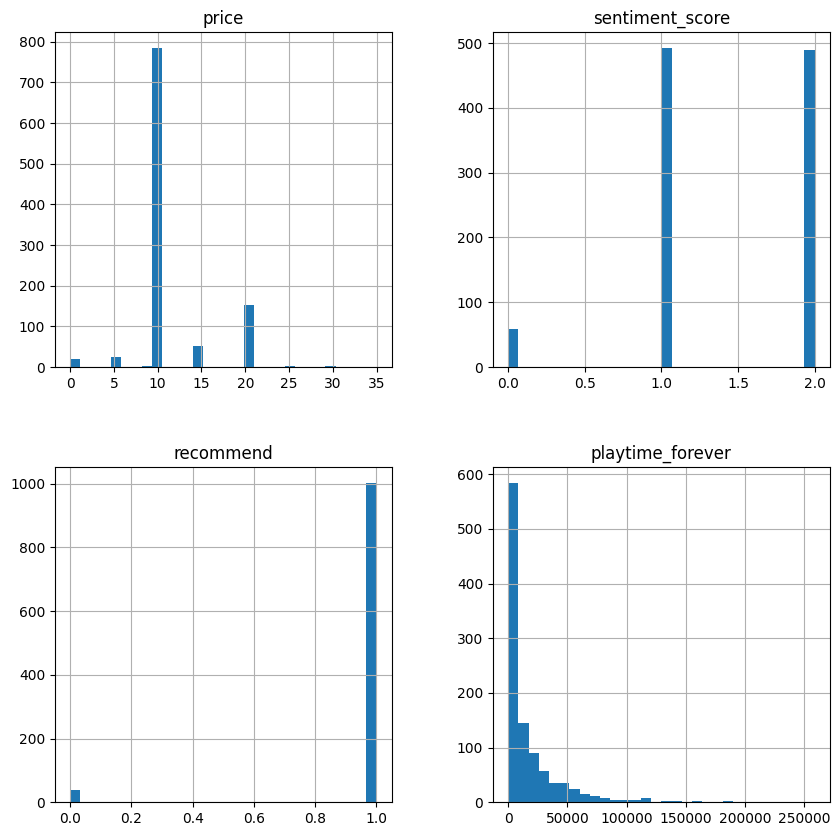

In [24]:
df[['price', 'sentiment_score', 'recommend', 'playtime_forever']].hist(bins=30, figsize=(10, 10))
plt.show()

In [25]:
# for column in ['price', 'sentiment_score', 'recommend', 'playtime_forever']:
#     sns.kdeplot(df[column], fill=True)
#     plt.title(column)
#     plt.show()

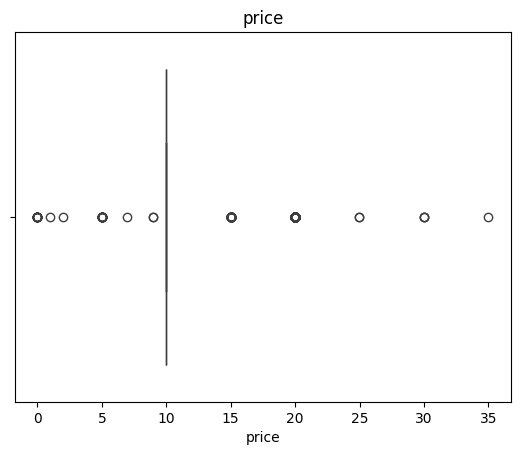

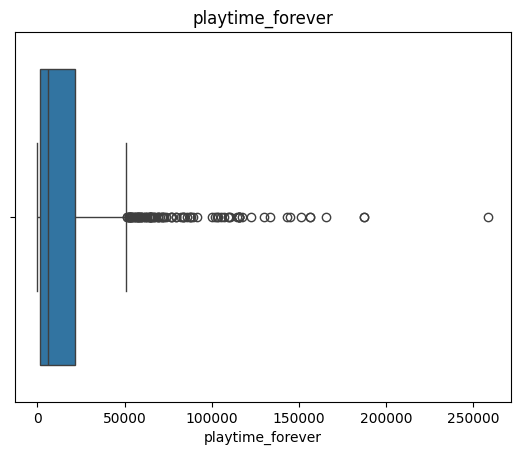

In [26]:
for column in ['price', 'playtime_forever']:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

# Step 4: Feature Relationships

    Scatterplot
    Heatmap Correlation
    Pairplot
    Groupby comparisons


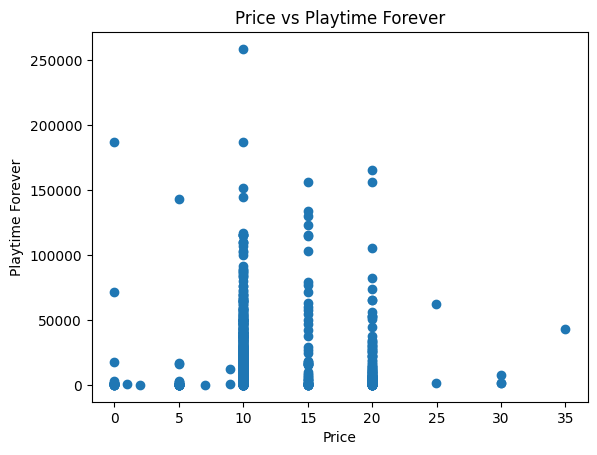

In [27]:
plt.scatter(df['price'], df['playtime_forever'])
plt.xlabel('Price')
plt.ylabel('Playtime Forever')
plt.title('Price vs Playtime Forever')
plt.show()

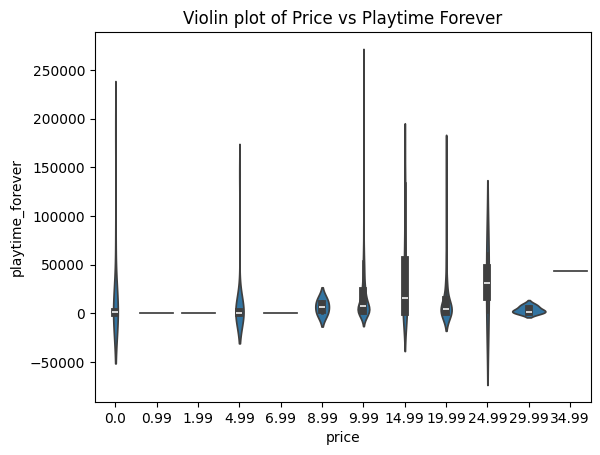

In [28]:
sns.violinplot(x='price', y='playtime_forever', data=df)
plt.title('Violin plot of Price vs Playtime Forever')
plt.show()

In [29]:
# Count the number of negative values in 'playtime_forever'
num_negative_values = (df['playtime_forever'] < 0).sum()

print(f"There are {num_negative_values} negative values in the 'playtime_forever' column.")

There are 0 negative values in the 'playtime_forever' column.


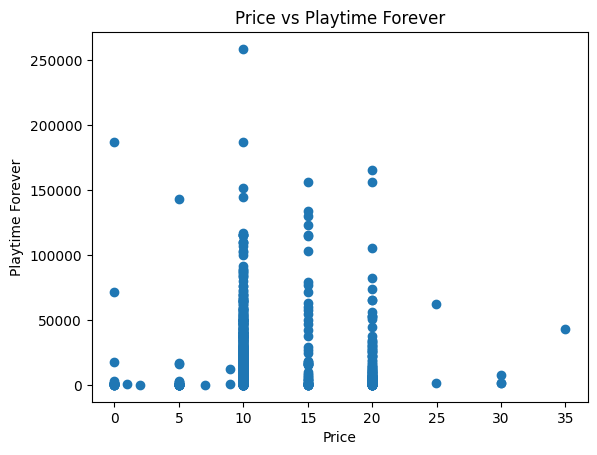

In [30]:
plt.scatter(df['price'], df['playtime_forever'])
plt.xlabel('Price')
plt.ylabel('Playtime Forever')
plt.title('Price vs Playtime Forever')
plt.show()

/home/p/Code/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


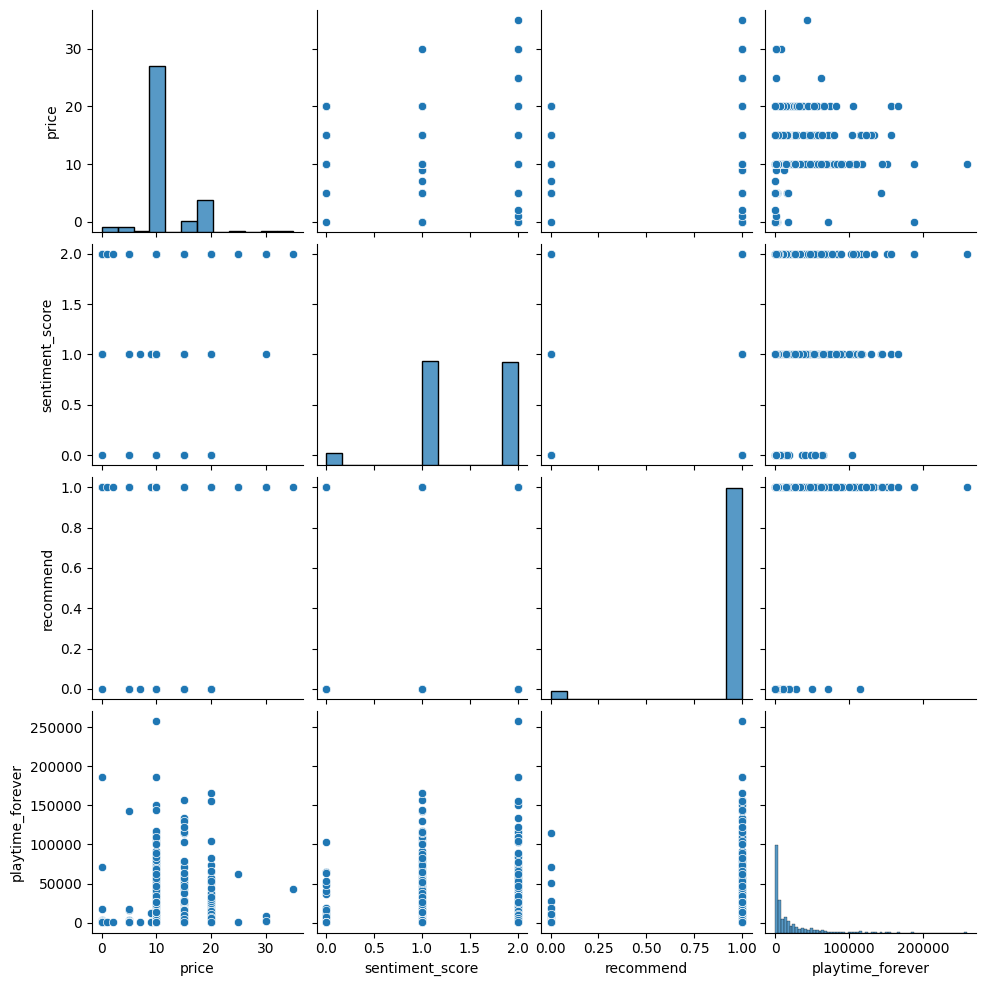

In [31]:
sns.pairplot(df[['price', 'sentiment_score', 'recommend', 'playtime_forever']])
plt.show()

/home/p/Code/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


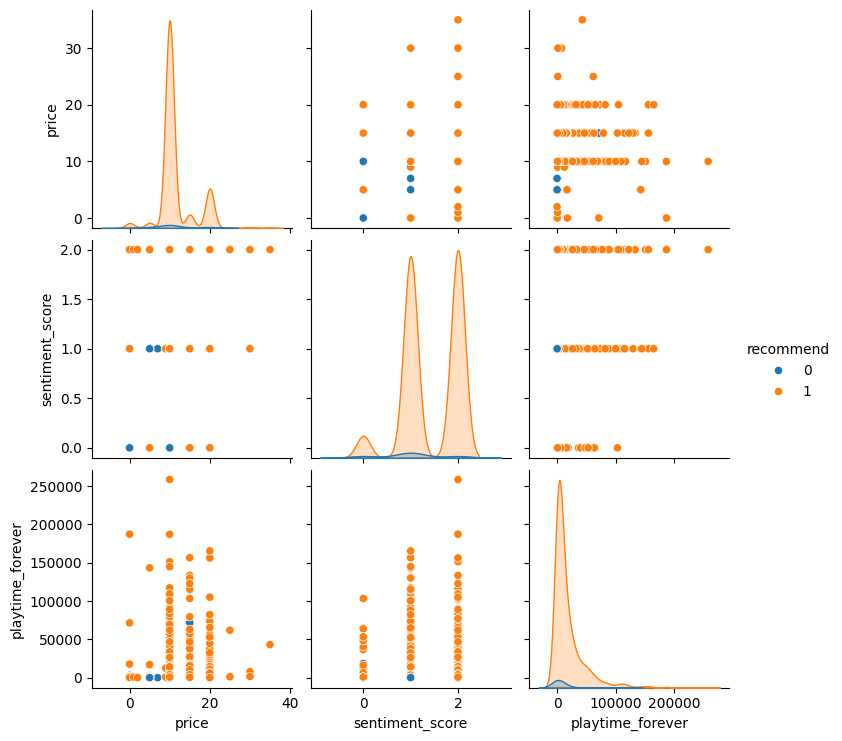

In [32]:
sns.pairplot(df, vars=['price', 'sentiment_score', 'playtime_forever'], hue='recommend')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1041 non-null   object 
 1   genres            1041 non-null   object 
 2   app_name          1041 non-null   object 
 3   price             1041 non-null   float32
 4   release_date      1041 non-null   object 
 5   developer         1041 non-null   object 
 6   user_id           1041 non-null   object 
 7   item_id           1041 non-null   object 
 8   sentiment_score   1041 non-null   int64  
 9   recommend         1041 non-null   int64  
 10  playtime_forever  1041 non-null   int64  
dtypes: float32(1), int64(3), object(7)
memory usage: 85.5+ KB


In [9]:
df['genres']

0       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
1       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
2       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
3       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
4       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
                              ...                        
1036    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1037    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1038    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1039    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1040    ['War' 'First-Person' 'Action' 'Shooter' 'Mult...
Name: genres, Length: 1041, dtype: object

In [29]:
df

,id,genres,app_name,price,release_date,developer,user_id,item_id,sentiment_score,recommend
0,282010,"[Racing, Singleplayer, Action, Gore, Multiplay...",carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True
1,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True
2,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,GamerFag,70,0,True
3,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,76561198020928326,70,1,True
4,70,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,9.99,1998,Valve,Bluegills,70,2,True
...,...,...,...,...,...,...,...,...,...,...
49694,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,76561198023508728,80,1,False
49695,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,Lone_walker,80,2,True
49696,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,green290,80,1,True
49697,80,"[Strategy, FPS, Singleplayer, Action, Atmosphe...",counter-strike: condition zero,9.99,2004,Valve,174gamecuman700kngkakak,80,1,True


In [31]:
import pandas as pd

def explode_and_dummy_genres(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function takes a DataFrame, creates a copy of it, filters the rows that have a recommendation,
    explodes the 'genres' column (i.e., transforms each element of a list-like to a row, replicating index values),
    and creates dummy columns for each genre. It then returns the modified DataFrame.
    """
    # Create a copy of the DataFrame to avoid modifying the original one
    df_dummies = df.copy()

    # Filter rows that have a recommendation
    df_dummies = df_dummies[df_dummies['recommend'] > 0]

    # Use explode() to transform each element of the list in 'genres' column to a row
    df_dummies = df_dummies.explode('genres')

    # Create dummy columns for each genre
    df_dummies = pd.get_dummies(df_dummies, columns=['genres'])

    return df_dummies

# Use the function
df_dummies = explode_and_dummy_genres(df)

In [39]:
import pandas as pd

def explode_and_dummy_genres(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function takes a DataFrame, creates a copy of it, filters the rows that have a recommendation,
    explodes the 'genres' column (i.e., transforms each element of a list-like to a row, replicating index values),
    keeps only the top 50 most frequent genres, and creates dummy columns for each genre. 
    It then returns the modified DataFrame.
    """
    # Create a copy of the DataFrame to avoid modifying the original one
    df_dummies = df.copy()

    # Filter rows that have a recommendation
    df_dummies = df_dummies[df_dummies['recommend'] > 0]

    # Use explode() to transform each element of the list in 'genres' column to a row
    df_dummies = df_dummies.explode('genres')

    # Get the top 50 most frequent genres
    top_genres = df_dummies['genres'].value_counts().nlargest(50).index

    # Keep only the rows with the top 50 genres
    df_dummies = df_dummies[df_dummies['genres'].isin(top_genres)]

    # Create dummy columns for each genre
    genre_dummies = pd.get_dummies(df_dummies['genres'])
    
    # Drop the original 'genres' column and add the new dummy columns
    df_dummies = pd.concat([df_dummies.drop('genres', axis=1), genre_dummies], axis=1)

    return df_dummies

# Use the function
df_dummies = explode_and_dummy_genres(df)

In [44]:
df_dummies.head(15)

,id,app_name,price,release_date,developer,user_id,item_id,sentiment_score,recommend,2D,...,Strategy,Survival,Survival Horror,Tactical,Team-Based,Third Person,Third-Person Shooter,Trading,War,Zombies
0,282010,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True,False,...,False,False,False,False,False,False,False,False,False,False
0,282010,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True,False,...,False,False,False,False,False,False,False,False,False,False
0,282010,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True,False,...,False,False,False,False,False,False,False,False,False,False
0,282010,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True,False,...,False,False,False,False,False,False,False,False,False,False
0,282010,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,70,half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,70,half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,70,half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,70,half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,70,half-life,9.99,1998,Valve,EizanAratoFujimaki,70,1,True,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# Lista de columnas de géneros
genre_cols = ['2D', 'Action', 'Adventure', 'Atmospheric', 'Building', 'Casual', 'Class-Based', 'Co-op', 'Comedy',
              'Competitive', 'Crafting', 'Difficult', 'Exploration', 'FPS', 'Fast-Paced', 'First-Person', 
              'Free to Play', 'Funny', 'Gore', 'Great Soundtrack', 'Horror', 'Indie', 'Massively Multiplayer',
              'Military', 'Moddable', 'Multiplayer', 'Online Co-Op', 'Open World', 'Post-apocalyptic', 'PvP', 
              'RPG', 'Realistic', 'Replay Value', 'Robots', 'Sandbox', 'Sci-fi', 'Shooter', 'Simulation', 
              'Singleplayer', 'Story Rich', 'Strategy', 'Survival', 'Survival Horror', 'Tactical', 'Team-Based', 
              'Third Person', 'Third-Person Shooter', 'Trading', 'War', 'Zombies']

# Comprueba si hay al menos un True en cada columna de géneros
any_true = df_dummies[genre_cols].any()

print(any_true)

2D                       True
Action                   True
Adventure                True
Atmospheric              True
Building                 True
Casual                   True
Class-Based              True
Co-op                    True
Comedy                   True
Competitive              True
Crafting                 True
Difficult                True
Exploration              True
FPS                      True
Fast-Paced               True
First-Person             True
Free to Play             True
Funny                    True
Gore                     True
Great Soundtrack         True
Horror                   True
Indie                    True
Massively Multiplayer    True
Military                 True
Moddable                 True
Multiplayer              True
Online Co-Op             True
Open World               True
Post-apocalyptic         True
PvP                      True
RPG                      True
Realistic                True
Replay Value             True
Robots    

In [43]:
df_dummies.columns

Index(['id', 'app_name', 'price', 'release_date', 'developer', 'user_id',
       'item_id', 'sentiment_score', 'recommend', '2D', 'Action', 'Adventure',
       'Atmospheric', 'Building', 'Casual', 'Class-Based', 'Co-op', 'Comedy',
       'Competitive', 'Crafting', 'Difficult', 'Exploration', 'FPS',
       'Fast-Paced', 'First-Person', 'Free to Play', 'Funny', 'Gore',
       'Great Soundtrack', 'Horror', 'Indie', 'Massively Multiplayer',
       'Military', 'Moddable', 'Multiplayer', 'Online Co-Op', 'Open World',
       'Post-apocalyptic', 'PvP', 'RPG', 'Realistic', 'Replay Value', 'Robots',
       'Sandbox', 'Sci-fi', 'Shooter', 'Simulation', 'Singleplayer',
       'Story Rich', 'Strategy', 'Survival', 'Survival Horror', 'Tactical',
       'Team-Based', 'Third Person', 'Third-Person Shooter', 'Trading', 'War',
       'Zombies'],
      dtype='object')

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

# Lista de columnas de géneros
genre_cols = ['2D', 'Action', 'Adventure', 'Atmospheric', 'Building', 'Casual', 'Class-Based', 'Co-op', 'Comedy',
              'Competitive', 'Crafting', 'Difficult', 'Exploration', 'FPS', 'Fast-Paced', 'First-Person', 
              'Free to Play', 'Funny', 'Gore', 'Great Soundtrack', 'Horror', 'Indie', 'Massively Multiplayer',
              'Military', 'Moddable', 'Multiplayer', 'Online Co-Op', 'Open World', 'Post-apocalyptic', 'PvP', 
              'RPG', 'Realistic', 'Replay Value', 'Robots', 'Sandbox', 'Sci-fi', 'Shooter', 'Simulation', 
              'Singleplayer', 'Story Rich', 'Strategy', 'Survival', 'Survival Horror', 'Tactical', 'Team-Based', 
              'Third Person', 'Third-Person Shooter', 'Trading', 'War', 'Zombies']

def recomendacion_juego(df_dummies, product_id, k=5):
    # Asegúrate de que product_id está en el índice del DataFrame
    if product_id not in df_dummies.index:
        raise ValueError(f"Product ID {product_id} not found in DataFrame index.")
    
    # Obtiene las características del juego dado
    product_features = df_dummies.loc[product_id, genre_cols].values.reshape(1, -1)
    
    # Calcula la similitud del coseno entre el juego dado y todos los demás
    similarities = cosine_similarity(df_dummies.loc[:, genre_cols], product_features).flatten()
    
    # Crea una serie con las similitudes
    similarity_series = pd.Series(similarities, index=df_dummies.index)
    
    # Ordena los juegos por similitud y toma los primeros k
    top_k = similarity_series.sort_values(ascending=False).head(k+1).iloc[1:]
    
    # Devuelve los IDs de los juegos recomendados
    return top_k.index.tolist()

In [75]:
df_dummies.loc[440, genre_cols]

,2D,Action,Adventure,Atmospheric,Building,Casual,Class-Based,Co-op,Comedy,Competitive,...,Strategy,Survival,Survival Horror,Tactical,Team-Based,Third Person,Third-Person Shooter,Trading,War,Zombies
440,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_dummies = df_dummies.drop('id', axis=1)

In [108]:
# Lista de columnas de géneros
genre_cols = ['2D', 'Action', 'Adventure', 'Atmospheric', 'Building', 'Casual', 'Class-Based', 'Co-op', 'Comedy',
              'Competitive', 'Crafting', 'Difficult', 'Exploration', 'FPS', 'Fast-Paced', 'First-Person', 
              'Free to Play', 'Funny', 'Gore', 'Great Soundtrack', 'Horror', 'Indie', 'Massively Multiplayer',
              'Military', 'Moddable', 'Multiplayer', 'Online Co-Op', 'Open World', 'Post-apocalyptic', 'PvP', 
              'RPG', 'Realistic', 'Replay Value', 'Robots', 'Sandbox', 'Sci-fi', 'Shooter', 'Simulation', 
              'Singleplayer', 'Story Rich', 'Strategy', 'Survival', 'Survival Horror', 'Tactical', 'Team-Based', 
              'Third Person', 'Third-Person Shooter', 'Trading', 'War', 'Zombies']

In [134]:
# Convert the boolean 'recommend' column to int
df_dummies['recommend'] = df_dummies['recommend'].astype(int)

# Create a new 'rating' column by adding 'recommend' (multiplied by a factor) and 'sentiment_score'
df_dummies['rating'] = df_dummies['recommend'] * 2 + df_dummies['sentiment_score']

# 
genre_cols_with_rating = ['rating']

In [146]:
def game_recommendation(df_dummies, product_id, k=5):
    """
    This function recommends games based on their similarity to a given game.
    
    Parameters:
    df_dummies (DataFrame): The DataFrame containing the game features.
    product_id (int): The id of the game to base the recommendations on.
    k (int): The number of recommendations to return. Default is 5.
    
    Returns:
    list: The ids of the recommended games.
    """
    
    # Ensure that product_id is in the DataFrame index
    if product_id not in df_dummies.index:
        raise ValueError(f"Product ID {product_id} not found in DataFrame index.")
    
    # Get the features of the given game
    product_features = df_dummies.loc[product_id].values.reshape(1, -1)
    
    # Compute the cosine similarity between the given game and all other games
    similarities = cosine_similarity(df_dummies, product_features).flatten()
    
    # Create a series with the similarities
    similarity_series = pd.Series(similarities, index=df_dummies.index)
    
    # Sort the games by similarity
    sorted_similarities = similarity_series.sort_values(ascending=False)
    
    # Initialize an empty list to store the recommendations
    recommendations = []
    recommended_ids = []
    
    # Iterate over the games sorted by similarity
    for idx in sorted_similarities.index:
        # If the game is not the given game and its id is not already in the recommendations
        item_id = df_dummies.loc[idx, 'item_id']  # Get the item_id as a scalar value
        if idx != product_id and item_id not in recommended_ids:
            # Add the game to the recommendations
            recommendations.append(idx)
            recommended_ids.append(item_id)
            # If we have k recommendations, stop adding more
            if len(recommendations) == k:
                break
    
    # Return the recommendations
    return recommendations

In [147]:
recomendations = game_recommendation(df_dummies, 440)
print(recomendations)

ValueError: could not convert string to float: 'carmageddon max pack'

In [140]:
nombres_duplicados = df['app_name'][df['app_name'].duplicated(keep=False)]
print(nombres_duplicados)

1                             half-life
2                             half-life
3                             half-life
4                             half-life
5                             half-life
                      ...              
49694    counter-strike: condition zero
49695    counter-strike: condition zero
49696    counter-strike: condition zero
49697    counter-strike: condition zero
49698    counter-strike: condition zero
Name: app_name, Length: 48523, dtype: object


In [130]:
df_dummies

,app_name,price,release_date,developer,user_id,item_id,sentiment_score,recommend,2D,Action,...,Survival,Survival Horror,Tactical,Team-Based,Third Person,Third-Person Shooter,Trading,War,Zombies,rating
0,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,1,False,False,...,False,False,False,False,False,False,False,False,False,3
0,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,1,False,True,...,False,False,False,False,False,False,False,False,False,3
0,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,1,False,False,...,False,False,False,False,False,False,False,False,False,3
0,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,1,False,False,...,False,False,False,False,False,False,False,False,False,3
0,carmageddon max pack,9.99,1997,Stainless Games Ltd,InstigatorAU,282010,1,1,False,False,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49698,counter-strike: condition zero,9.99,2004,Valve,lachwe,80,0,1,False,False,...,False,False,False,False,False,False,False,False,False,2
49698,counter-strike: condition zero,9.99,2004,Valve,lachwe,80,0,1,False,False,...,False,False,False,False,False,False,False,False,False,2
49698,counter-strike: condition zero,9.99,2004,Valve,lachwe,80,0,1,False,False,...,False,False,False,False,False,False,False,False,False,2
49698,counter-strike: condition zero,9.99,2004,Valve,lachwe,80,0,1,False,False,...,False,False,False,False,False,False,False,False,False,2
